In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import brighteyes_ism.analysis.Graph_lib as gra 
import GitHub_Correlogram_Sim as cs

In [2]:
def random_Z():
    num_elements = np.random.randint(1, 6)  
    random_array = np.random.choice(np.arange(5, 12), size=num_elements, replace=False)  
    
    lower_bound = np.round(-np.pi/2, 2)
    upper_bound = np.round(np.pi/2, 2)
    
    corresponding_values = np.random.normal(loc=0, scale=1, size=num_elements) 
    corresponding_values = np.clip(corresponding_values, lower_bound, upper_bound)  
    
    corresponding_values = np.round(corresponding_values * 100) / 100  
    
    # Output the results
    print("Random Unique Array:", random_array)
    print("Corresponding Values:", corresponding_values)
    
    return random_array,corresponding_values

In [3]:
ite = 1  #iteration for simulations
nz = 3   #planes
var =  1 #type of sample

PSFs = np.zeros((ite,nz,121,121,25))
correlograms = np.zeros((ite,128,128,25,nz))
fp  = np.zeros((ite,25,3))
img  = np.zeros((ite,401,401,25,3))

for i in range(0,ite):
    number, amplitude = random_Z()
    PSFs[i,:,:,:,:], correlograms[i,:,:,:,:], fp[i,:,:], img[i,:,:,:,:]= cs.Corr_generator(amplitude, number, nz, var)
    

Random Unique Array: [9 5 6]
Corresponding Values: [-0.46  0.38  0.04]
Calculating the PSFs at z = -394.1326530612245 nm
Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [02:46<00:00,  1.38s/it]


Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [02:39<00:00,  1.32s/it]


Calculating the PSFs at z = 0.0 nm
Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [03:01<00:00,  1.50s/it]


Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [02:21<00:00,  1.17s/it]


Calculating the PSFs at z = 394.1326530612245 nm
Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [02:11<00:00,  1.08s/it]


Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 121/121 [02:07<00:00,  1.06s/it]


Aberrations : [-0.46  0.38  0.04]
Aberrations #: [9 5 6]


-Dof


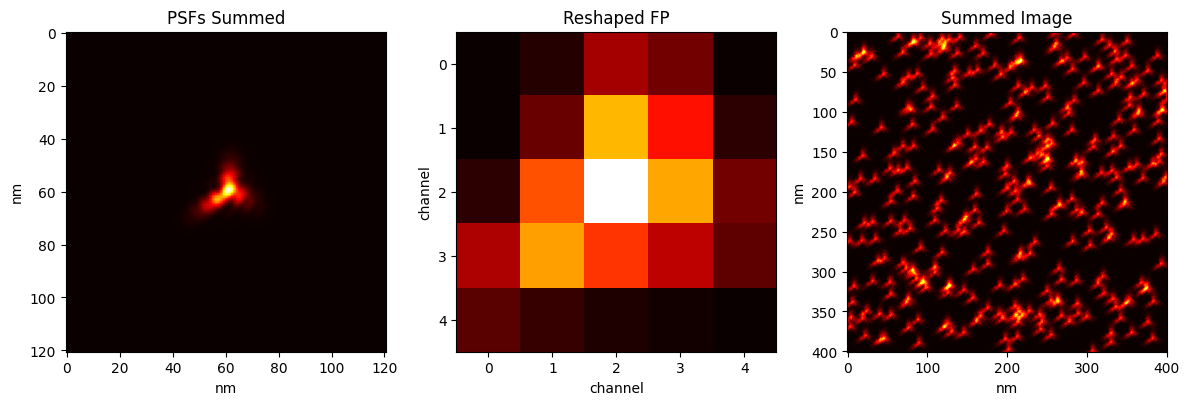

In [11]:
plt.figure(figsize=(12, 4))  
print("-Dof")

plt.subplot(1, 3, 1)
plt.imshow(np.sum(PSFs[0, 0, :, :, :], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("PSFs Summed")

plt.subplot(1, 3, 2)
plt.imshow(np.reshape(fp[0, :,0], (5, 5)), cmap='hot')
plt.xlabel("channel")
plt.ylabel("channel")
plt.title("Reshaped FP")

plt.subplot(1, 3, 3)
plt.imshow(np.sum(img[0,:,:,:,0], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("Summed Image")

plt.subplots_adjust(wspace=0.3) 
plt.tight_layout() 

plt.show()

0


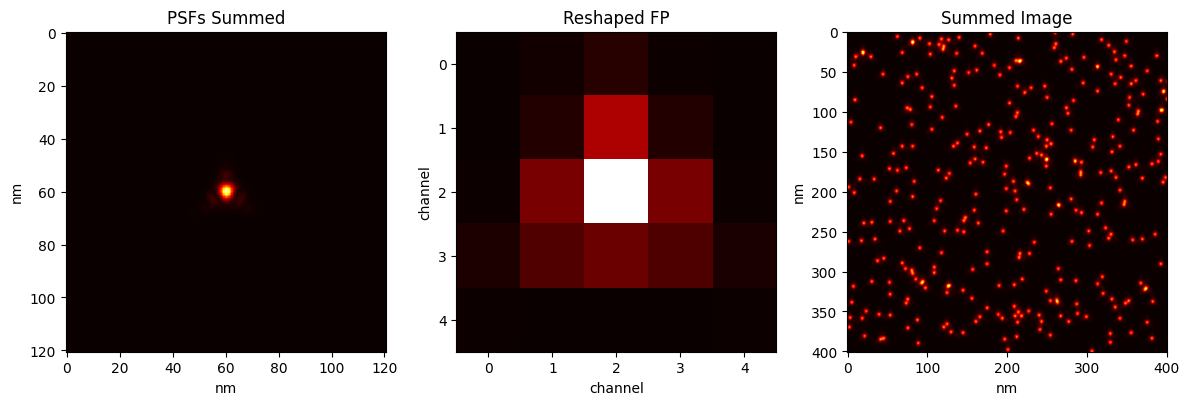

In [12]:
plt.figure(figsize=(12, 4))  
print("0")

plt.subplot(1, 3, 1)
plt.imshow(np.sum(PSFs[0, 1, :, :, :], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("PSFs Summed")

plt.subplot(1, 3, 2)
plt.imshow(np.reshape(fp[0,:,1], (5, 5)), cmap='hot')
plt.xlabel("channel")
plt.ylabel("channel")
plt.title("Reshaped FP")

plt.subplot(1, 3, 3)
plt.imshow(np.sum(img[0,:,:,:,1], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("Summed Image")

plt.subplots_adjust(wspace=0.3) 
plt.tight_layout() 

plt.show()

+Dof


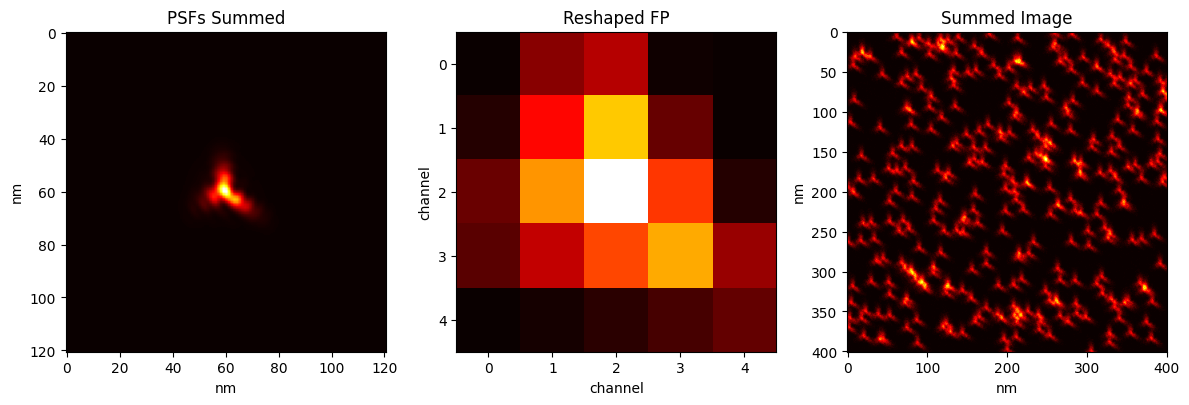

In [15]:
plt.figure(figsize=(12, 4)) 
print("+Dof")

plt.subplot(1, 3, 1)
plt.imshow(np.sum(PSFs[0, 2, :, :, :], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("PSFs Summed")

plt.subplot(1, 3, 2)
plt.imshow(np.reshape(fp[0,:,2], (5, 5)), cmap='hot')
plt.xlabel("channel")
plt.ylabel("channel")
plt.title("Reshaped FP")

plt.subplot(1, 3, 3)
plt.imshow(np.sum(img[0,:,:,:,2], axis=2), cmap='hot')
plt.xlabel("nm")
plt.ylabel("nm")
plt.title("Summed Image")

plt.subplots_adjust(wspace=0.3) 
plt.tight_layout() 

plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

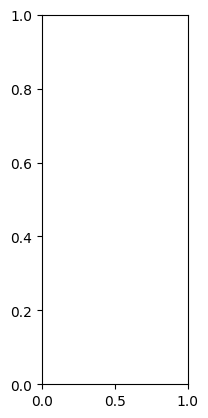

In [9]:
import GitHub_CNNx1 as cnnx1
import GitHub_CNNx3 as cnnx3
import GitHub_CNNx1_transfer as tflx1
import GitHub_CNNx3_transfer as tflx3
import GitHub_DataAugmentation as dag

path = r'C:\Users\ffersini\OneDrive - Fondazione Istituto Italiano Tecnologia\FFersini\Code for Analysis\GitHub'

wandb: Currently logged in as: ffersini. Use `wandb login --relogin` to force relogin


In [10]:
#%%CNNx1 Training 

cor_path = np.load(path+'\data_mix_for_training.npy')
lab_path = np.load(path+'\labe_mix_for_training.npy')
cnnx1.CNNx1(cor_path,lab_path)

#%%CNNx1 Testing 

test_cor_path = np.load(path+'\Data for test\Corr.npy')
labe_cor_path = np.load(path+'\Data for test\Labe.npy')

pred_TR_x1,labe = cnnx1.CNNx1_test(test_cor_path, labe_cor_path)

#%%CNNx1 TransferLearning 

path_weights = path+'\GitHub\modelx1.h5'
path_file = path+'\modelx1.json'

new_file =  np.load(path+'\data_single_abe_TL.npz')['correlograms']
new_label = np.load(path+'\data_single_abe_TL.npz')['labels']

test_cor_path = np.load(path+'\data_single_test.npz')['correlograms']
labe_cor_path = np.load(path+'\data_single_test.npz')['labels']

pred,labe = tflx1.transfer_cnnx1(path_weights, path_file, new_file, new_label, test_cor_path, labe_cor_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ffersini\\OneDrive - Fondazione Istituto Italiano Tecnologia\\FFersini\\Code for Analysis\\GitHub\\data_mix_for_training.npy'

In [ ]:
cor_path = np.load(path+'\data_mix_for_training.npy')
lab_path = np.load(path+'\labe_mix_for_training.npy')

cnnx3.CNNx3(cor_path,lab_path)

#%%CNNx3 Testing 

test_cor_path = np.load(path+'\Data for test\Corr.npy')
labe_cor_path = np.load(path+'\Data for test\Labe.npy')

pred_TR_x3,labe = cnnx3.CNNx3_test(test_cor_path, labe_cor_path)

#%%CNNx3 TransferLearning 

path_weights = path+'\modelx3.h5'
path_file = path+'\modelx3.json'

new_file = np.load(path+'\Data for test\Corr.npy')
new_label = np.load(path+'\Data for test\Labe.npy')

test_cor_path = np.load(path+'\Data for transfer learning\data_single_test.npz')['correlograms']
labe_cor_path = np.load(path+'\Data for transfer learning\data_single_test.npz')['labels']

pred,labe = tflx3.transfer_cnnx3(path_weights, path_file, new_file, new_label, test_cor_path, labe_cor_path)